# Illustration of clustering on Velib data

In [1]:
rm(list = ls())

library(funFEM)

data(velib)

# data preparation
x <- as.matrix(velib$data)
colnames(x) <- 1:ncol(x)
rownames(x) <- velib$names

# consider a subsample
set.seed(0)
n <- nrow(x)
stations <- sample(1:n, size = 200)
coord <- velib$position[stations,]

# select exactly 7 days of data
dates <- 14:181
x <- x[stations, dates]  
colnames(x) <- 1:length(dates)


Loading required package: MASS

Loading required package: fda

Loading required package: Matrix


Attaching package: ‘fda’


The following object is masked from ‘package:graphics’:

    matplot


Loading required package: elasticnet

Loading required package: lars

Loaded lars 1.2




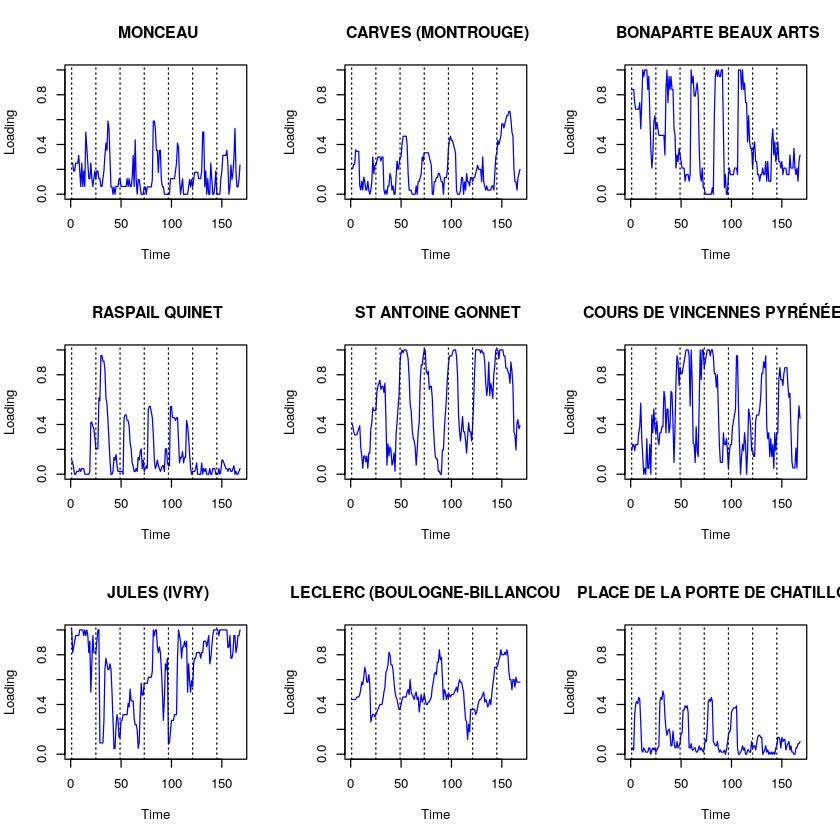

In [2]:
timeTick <- 1 + 24*(0:6)  # vector corresponding to the beginning of days
par(mfrow = c(3, 3))
for (i in 1:9){
  plot(x[i, ], col = "blue", type = "l", ylim = c(0, 1),
       xlab = "Time", ylab = "Loading", main = rownames(x)[i])
  abline(v = timeTick, lty = "dotted")
}

In [3]:
# From now on, we use numbers instead of station names, 
# in order to simplify printing
rownames(x) <- 1:nrow(x)

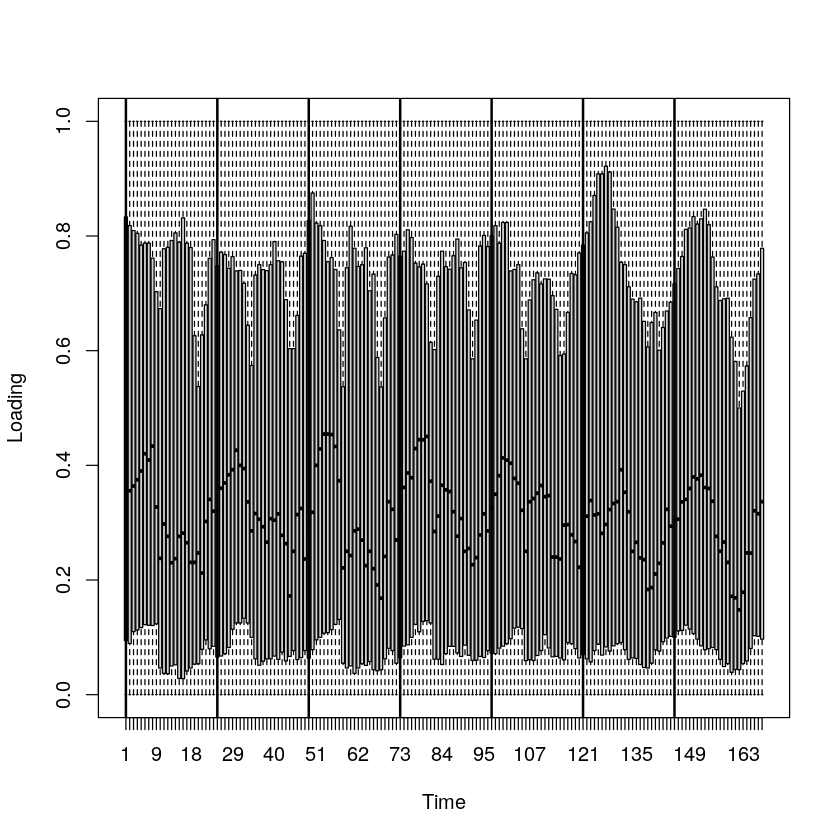

In [4]:
# Boxplot of the variables, sorted in time order
par(mfrow = c(1, 1))
boxplot(x, xlab = "Time", ylab = "Loading")
abline(v = timeTick, lwd = 2)


### Question 1.
Look at the boxplot of the variables, sorted in time order. 
What can you say about the distribution of the variables? 
Position, dispersion, symmetry?

Du lundi au vendredi, les distributions sont similaires (taux de chargement élevé la nuit et en journée, faible aux heures d'entrée et de sortie de bureau). On a donc une périodicité sur cette période. De même, la distribution des jours du week-end sont proches (taux de chargement faible l'après-midi).

Aussi, à une heure donnée, le taux de chargement d'une station à l'autre varie beaucoup (par ex. le samedi matin, 1er quantile à 0.1 et 3ème à 0.9.

### Question 2.

a) Perform hierarchical clustering with Ward criterion. 
Plot the dendrogram and the heights versus the number of classes. 
Why choosing 6 classes seems logical?
Do you see another reasonable choice? 

b) What can you say of the sizes of the corresponding classes? 
Are there classes with only one individual? 
This could happen with another criterion: which one? Try it.

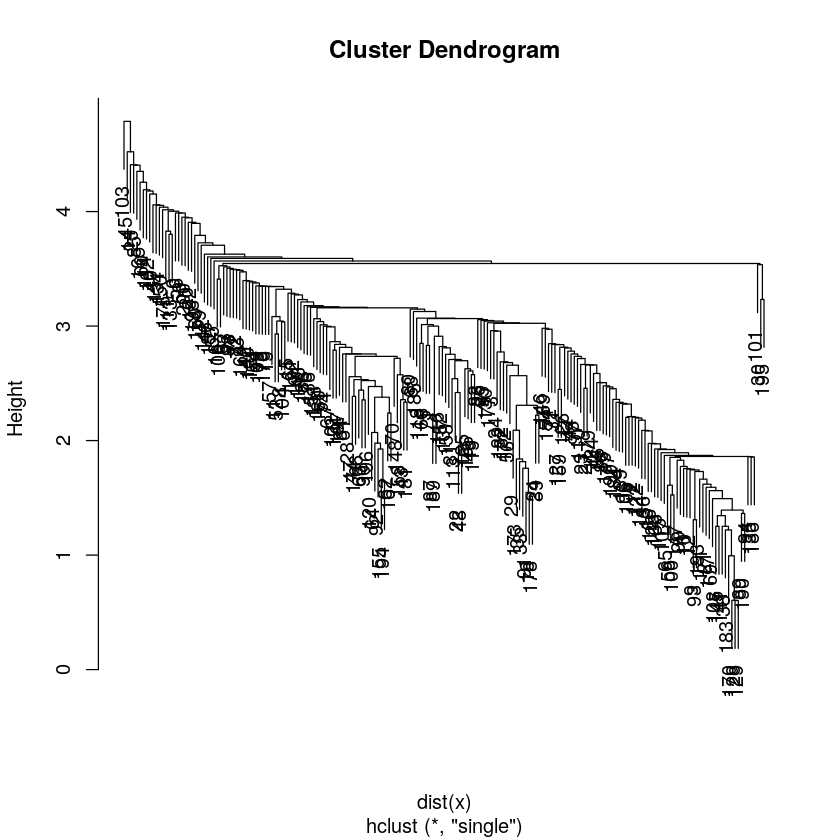

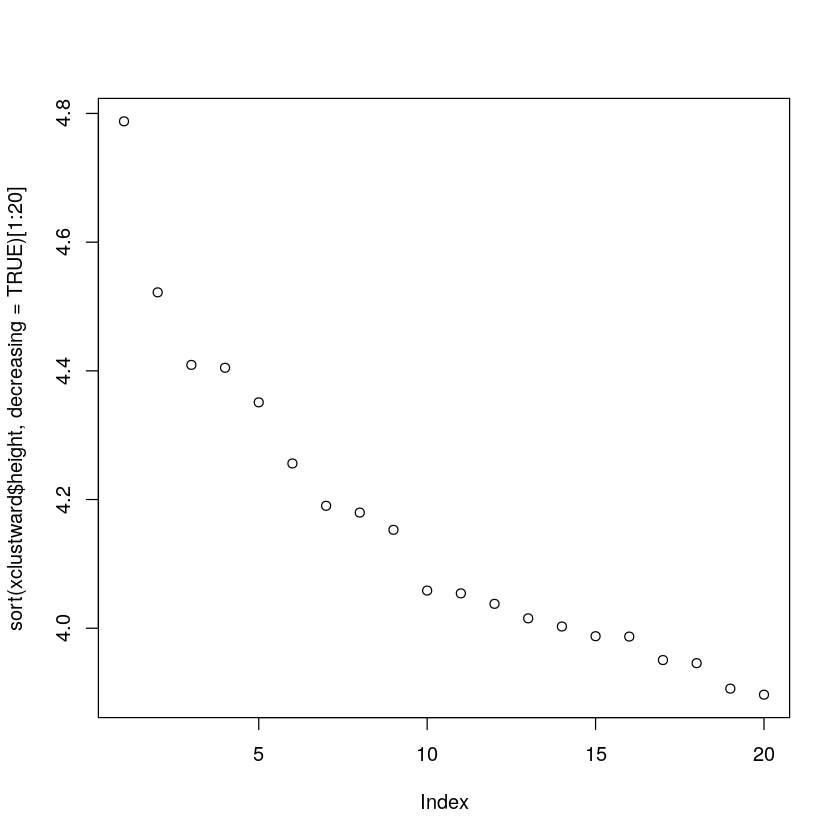

In [24]:
# a)

xclustward <- hclust(dist(x), method="single")
plot(xclustward)

plot(sort(xclustward$height, decreasing = TRUE)[1:20])

# On choisit 6 classes car sur le graphique hauteur/nb de classes, 
# on voit que le saut entre le 5ème et le 6ème point est assez important,
# alors que les suivants ne représentent pas d'intérêt
# On ne choisit pas moins de 6 classes car on a remarqué sur l'exemple que
# l'on a affiché précédemment que le taux de chargement des stations est 
# assez différent de l'une à l'autre et que celles-ci ne peuvent pas être
# réparties dans un nombre trop faible de classes.
# Un autre choix raisonnable est alors de choisir 4 classes.




In [26]:
# b)

class <- cutree(xclustward, k = 6)
table(class)

# On a pas de classes quasiment vide 
# En revanche, avec la méthode "single", on a une classe de 195 éléments
# et 5 classes de 1 élément


class
  1   2   3   4   5   6 
195   1   1   1   1   1 

### Question 3.
Perform k-means with K = 6 classes.

(a) Represent the center of each class as a discrete curve. 
Give the interpretation of the center of class 1 
(remember that vertical straight lines are separations between days, 
from Monday to Sunday). Same question with class 5.

(b) Which criterion aims at minimizing k-means? Is the optimum found local or global?

(c) In order to visualize the quality of the clustering, 
represent the boxplots of loading profiles for each time step, and for each class. 
Are the classes homogeneous? Interpret the results in terms 
of within-class variance and global variance.


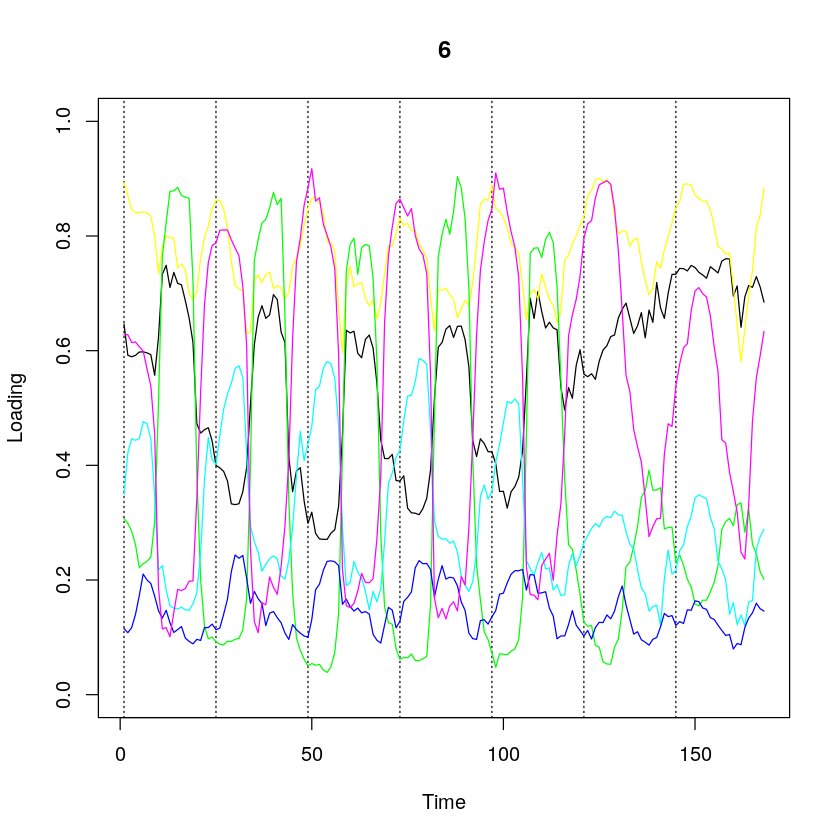

In [42]:
#a)

centroids = kmeans(x, centers = 6)
plot(centroids$centers[1,], type = "l", ylim = c(0, 1),
       xlab = "Time", ylab = "Loading", main = rownames(x)[i])
      abline(v = timeTick, lty = "dotted")

colorv = rainbow(6)
for (i in 2:6){
    lines(centroids$centers[i,], col=colorv[i])
}

# Le centre de la classe est une courbe qui minimise l'inertie de la classe
# La classe 1 est donc composée de stations très utilisées la semaine
# (grosse variation du taux de chargement) et très peu utilisées le we
# Aussi, les stations sont très chargées en journée. On peut donc supposer
# que ce sont des stations proches des lieux de travail.
# La classe 5 est composée de stations utilisées en semaine et un peu le we.
# Elles sont très chargées la nuit, on peut donc supposer que ce sont des 
# stations proches de lieux de résidences (ou de boîtes de nuit)

In [ ]:
# b)


### Question 4. 

Plot the results on a map, using the station coordinates.
In practice, what is missing to interpret the results?

In [ ]:
# R code

### Question 5
Ready to go further? Now we consider all the data (not a subsample).
We need to reduce dimension, by approximating the functions in a Fourier basis (for instance). Then redo questions 1-4 by doing clustering on the coefficients of the Fourier basis. 

Help: First run the example of function funDEM.

In [5]:
x[0,]

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


1,2,3,4,5,6,7,8,9,10,⋯,159,160,161,162,163,164,165,166,167,168
